In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import jax.numpy as jnp
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm, trange
import seaborn as sns
import scipy.stats as sci_stats

import src.metrics as metrics
import src.kernels as kernels
import src.bootstrap as boot

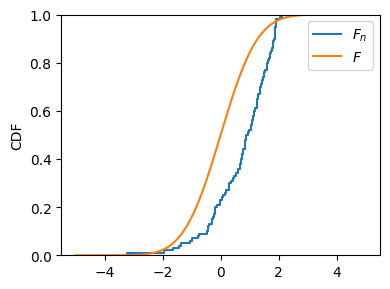

In [167]:
np.random.seed(2024)
xx = np.linspace(-5., 5., 1000)
theo_cdf = sci_stats.norm.cdf(xx)
# x = np.random.chisquare(10, size=100)
x = np.random.gamma(2., 1., size=100)
x = -(x - np.mean(x) - 1.) / np.std(x)

fig, ax = plt.subplots(figsize=(4, 3))

sns.ecdfplot(ax=ax, data=x, label=r"$F_n$")
ax.plot(xx, theo_cdf, label=r"$F$")
ax.set_ylabel("CDF")
ax.legend()

plt.tight_layout()

In [605]:
np.random.seed(2024)

In [606]:
x = np.random.normal(size=100, loc=0.5, scale=1.5)

In [607]:
ks_res = sci_stats.kstest(x, sci_stats.norm.cdf)
ks_res

KstestResult(statistic=0.27297344885418307, pvalue=4.480618585499958e-07, statistic_location=1.1899829275386222, statistic_sign=-1)

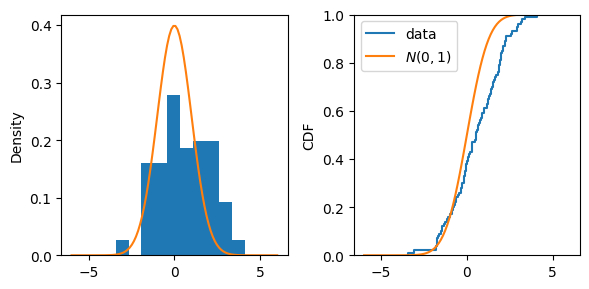

In [608]:
xx = np.linspace(-6., 6., 100)
theo_pdf = sci_stats.norm.pdf(xx)
theo_cdf = sci_stats.norm.cdf(xx)

figs, axes = plt.subplots(ncols=2, figsize=(6, 3))
ax = axes[0]
_ = ax.hist(x, bins=10, density=True)
ax.plot(xx, theo_pdf)
ax.set_ylabel("Density")

ax = axes[1]
sns.ecdfplot(ax=ax, data=x, label=r"data")
ax.plot(xx, theo_cdf, label=r"$N(0, 1)$")
ax.set_ylabel("CDF")
ax.legend()

plt.tight_layout()

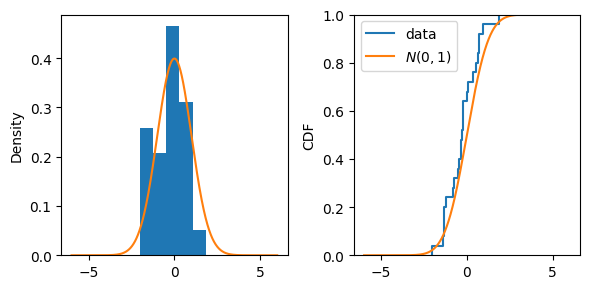

In [617]:
np.random.seed(2024)

df = 20
x = np.random.chisquare(df, size=25)
x = (x - df) / np.sqrt(2 * df)

xx = np.linspace(-6., 6., 1000)
theo_pdf = sci_stats.norm.pdf(xx)
theo_cdf = sci_stats.norm.cdf(xx)

figs, axes = plt.subplots(ncols=2, figsize=(6, 3))
ax = axes[0]
_ = ax.hist(x, bins=5, density=True)
ax.plot(xx, theo_pdf)
ax.set_ylabel("Density")

ax = axes[1]
sns.ecdfplot(ax=ax, data=x, label=r"data")
ax.plot(xx, theo_cdf, label=r"$N(0, 1)$")
ax.set_ylabel("CDF")
ax.legend()

plt.tight_layout()

In [618]:
ks_res = sci_stats.kstest(x, sci_stats.norm.cdf)
ks_res

KstestResult(statistic=0.2298977181220772, pvalue=0.12093365371940012, statistic_location=-0.2272818778797678, statistic_sign=1)

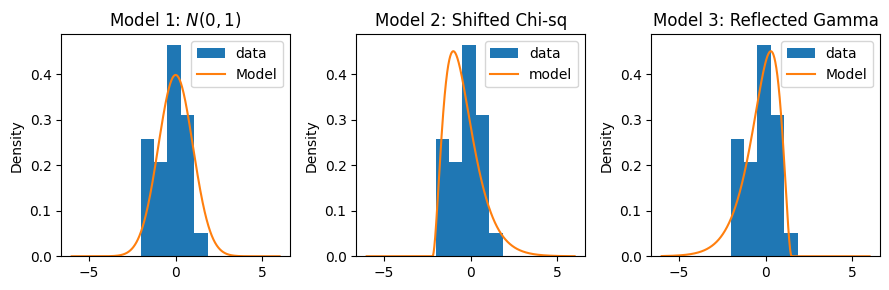

In [737]:
np.random.seed(2024)

df = 20
x = np.random.chisquare(df, size=25)
x = (x - df) / np.sqrt(2 * df)

xx = np.linspace(-6., 6., 1000)
theo_pdf1 = sci_stats.norm.pdf(xx)
theo_pdf2 = sci_stats.gamma.pdf(xx, 3, -2.2, 0.6)
# theo_pdf3 = sci_stats.expon.pdf(xx, 5, 2)
theo_pdf3 = sci_stats.gamma.pdf(-xx, 3, -1.5, 0.6)

theo_cdf1 = sci_stats.norm.cdf(xx)
# theo_cdf2 = sci_stats.chi2.cdf(xx, df=df, loc=-30, scale=.5)
theo_cdf2 = sci_stats.gamma.cdf(xx, 4., -4.)

figs, axes = plt.subplots(ncols=3, figsize=(9, 3))
ax = axes[0]
_ = ax.hist(x, bins=5, density=True, label=r"data")
ax.plot(xx, theo_pdf1, label=r"Model")
ax.set_ylabel("Density")
ax.set_title(r"Model 1: $N(0, 1)$")
# sns.ecdfplot(ax=ax, data=x, label=r"data")
# ax.plot(xx, theo_cdf1, label=r"$N(0, 1)$")
# ax.set_ylabel("CDF")
ax.legend()

ax = axes[1]
_ = ax.hist(x, bins=5, density=True, label=r"data")
ax.plot(xx, theo_pdf2, label="model")
ax.set_ylabel("Density")
ax.set_title(r"Model 2: Shifted Chi-sq")
# sns.ecdfplot(ax=ax, data=x, label=r"data")
# ax.plot(xx, theo_cdf2, label=r"$N(0, 1)$")
# ax.set_ylabel("CDF")
ax.legend()

ax = axes[2]
_ = ax.hist(x, bins=5, density=True, label=r"data")
ax.plot(xx, theo_pdf3, label=r"Model")
ax.set_ylabel("Density")
ax.set_title(r"Model 3: Reflected Gamma")
ax.legend()

plt.tight_layout()

In [716]:
ks_res = sci_stats.kstest(x, lambda tt: sci_stats.gamma.cdf(tt, 3., -2.2, 0.6))
ks_res

KstestResult(statistic=0.21948222302994486, pvalue=0.15440829320573624, statistic_location=-0.4973853082269091, statistic_sign=-1)

In [726]:
ks_res = sci_stats.kstest(x, lambda tt: sci_stats.gamma.cdf(-tt, 3., -1.5, 0.6))
ks_res

KstestResult(statistic=1.0, pvalue=0.0, statistic_location=1.845373743151853, statistic_sign=1)

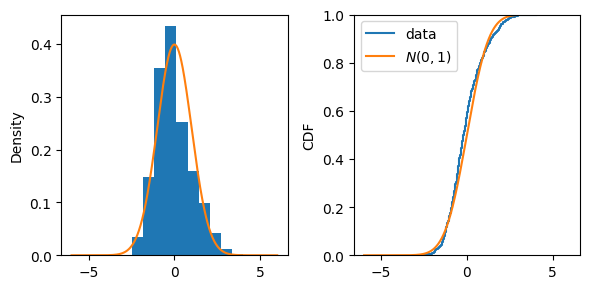

In [189]:
np.random.seed(2024)

df = 20
x = np.random.chisquare(df, size=500)
x = (x - df) / np.sqrt(2 * df)

xx = np.linspace(-6., 6., 1000)
theo_pdf = sci_stats.norm.pdf(xx)
theo_cdf = sci_stats.norm.cdf(xx)

figs, axes = plt.subplots(ncols=2, figsize=(6, 3))
ax = axes[0]
_ = ax.hist(x, bins=10, density=True)
ax.plot(xx, theo_pdf)
ax.set_ylabel("Density")

ax = axes[1]
sns.ecdfplot(ax=ax, data=x, label=r"data")
ax.plot(xx, theo_cdf, label=r"$N(0, 1)$")
ax.set_ylabel("CDF")
ax.legend()

plt.tight_layout()

In [190]:
ks_res = sci_stats.kstest(x, sci_stats.norm.cdf)
ks_res

KstestResult(statistic=0.08885660988255412, pvalue=0.0006946452868654732, statistic_location=-0.0021472042018798334, statistic_sign=1)

In [75]:
x_round = np.round(x, 1)
ks_res_round = sci_stats.kstest(x_round, sci_stats.norm.cdf)
ks_res_round

KstestResult(statistic=0.02514688224992645, pvalue=0.003524964000189459, statistic_location=0.6, statistic_sign=-1)

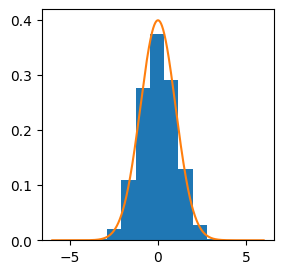

In [76]:
fig, ax = plt.subplots(figsize=(3, 3))
_ = ax.hist(x_round, bins=10, density=True)
ax.plot(xx, yy)

#### CDF

(-5.95, 14.95, -0.015327599910241444, 0.32187959811507033)

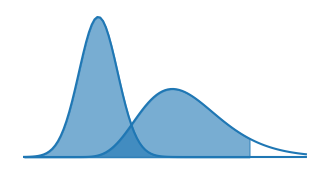

In [585]:
_, ax = plt.subplots(figsize=(4, 2))
xx = np.linspace(-5., 14., 101)
yy1 = sci_stats.norm.pdf(xx, scale=1.3)
yy2 = sci_stats.gamma.pdf(xx, 8., -2.)
# ax.plot(xx[:-20], yy1[:-20], color="C0")
ax.plot(xx, yy1, color="C0")
ax.plot(xx, yy2, color="C0")
ax.fill_between(xx[:-20], yy1[:-20], color="C0", alpha=0.6)
ax.fill_between(xx[:-20], yy2[:-20], color="C0", alpha=0.6)
ax.axis("off")

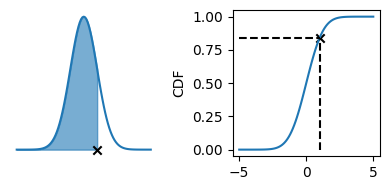

In [604]:
_, axes = plt.subplots(ncols=2, figsize=(4, 2))
xx = np.linspace(-5., 5., 101)
yy1 = sci_stats.norm.pdf(xx)
ax = axes[0]
ax.plot(xx, yy1, color="C0")
ax.fill_between(xx[:-40], yy1[:-40], color="C0", alpha=0.6)
ax.scatter(xx[60], 0., marker="x", color="k")
ax.axis("off")

theo_cdf = sci_stats.norm.cdf(xx)
ax = axes[1]
ax.plot(xx, theo_cdf)
ax.plot([xx[60], xx[60]], [0., theo_cdf[60]], "--k")
ax.plot([xx[0], xx[60]], [theo_cdf[60], theo_cdf[60]], "--k")
ax.scatter(xx[60], theo_cdf[60], marker="x", color="k")
ax.set_ylabel("CDF")

plt.tight_layout()

#### Type-I error

(-0.5, 10.5, -0.013533528323661271, 0.2842040947968867)

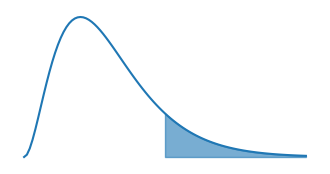

In [587]:
_, ax = plt.subplots(figsize=(4, 2))
xx = np.linspace(0., 10., 101)
yy1 = sci_stats.gamma.pdf(xx, 3., 0.)
yy2 = np.zeros_like(xx)
# ax.plot(xx[:-20], yy1[:-20], color="C0")
ax.plot(xx, yy1, color="C0")
ax.fill_between(xx[50:], yy1[50:], color="C0", alpha=0.6)
# ax.fill_between(xx, yy2, color="k")
ax.axis("off")

#### RKHS embedding

(-4.7, 10.7, -0.019911241509780346, 0.41813607170538725)

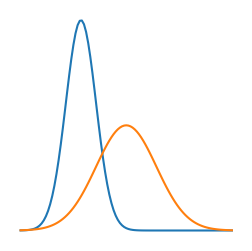

In [476]:
_, ax = plt.subplots(figsize=(3, 3))
xx = np.linspace(-4., 10., 101)
yy1 = sci_stats.norm.pdf(xx, scale=1)
yy2 = sci_stats.norm.pdf(xx, loc=3., scale=2.)
ax.plot(xx, yy1, color="C0")
ax.plot(xx, yy2, color="C1")
ax.axis("off")

#### RBF kernel

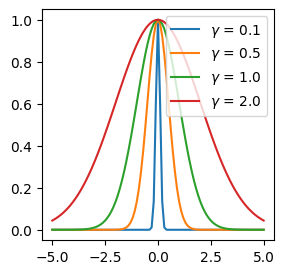

In [468]:
_, ax = plt.subplots(figsize=(3, 3))
xx = np.linspace(-5., 5., 101)
for bw in [0.1, 0.5, 1., 2.]:
    yy = np.exp(- xx**2 / (2 * bw**2))
    ax.plot(xx, yy, label=rf"$\gamma$ = {bw}")
    
ax.legend()

# MNIST

In [2]:
# REF: https://github.com/google/jax/blob/main/examples/datasets.py

import array
import gzip
import os
from os import path
import struct
import urllib.request


_DATA = "../data/tmp/jax_example_data/"


def _download(url, filename):
  """Download a url to a file in the JAX data temp directory."""
  if not path.exists(_DATA):
    os.makedirs(_DATA)
  out_file = path.join(_DATA, filename)
  if not path.isfile(out_file):
    urllib.request.urlretrieve(url, out_file)
    print(f"downloaded {url} to {_DATA}")


def _partial_flatten(x):
  """Flatten all but the first dimension of an ndarray."""
  return np.reshape(x, (x.shape[0], -1))


def _one_hot(x, k, dtype=np.float32):
  """Create a one-hot encoding of x of size k."""
  return np.array(x[:, None] == np.arange(k), dtype)


def mnist_raw():
  """Download and parse the raw MNIST dataset."""
  # CVDF mirror of http://yann.lecun.com/exdb/mnist/
  base_url = "https://storage.googleapis.com/cvdf-datasets/mnist/"

  def parse_labels(filename):
    with gzip.open(filename, "rb") as fh:
      _ = struct.unpack(">II", fh.read(8))
      return np.array(array.array("B", fh.read()), dtype=np.uint8)

  def parse_images(filename):
    with gzip.open(filename, "rb") as fh:
      _, num_data, rows, cols = struct.unpack(">IIII", fh.read(16))
      return np.array(array.array("B", fh.read()),
                      dtype=np.uint8).reshape(num_data, rows, cols)

  for filename in ["train-images-idx3-ubyte.gz", "train-labels-idx1-ubyte.gz",
                   "t10k-images-idx3-ubyte.gz", "t10k-labels-idx1-ubyte.gz"]:
    _download(base_url + filename, filename)

  train_images = parse_images(path.join(_DATA, "train-images-idx3-ubyte.gz"))
  train_labels = parse_labels(path.join(_DATA, "train-labels-idx1-ubyte.gz"))
  test_images = parse_images(path.join(_DATA, "t10k-images-idx3-ubyte.gz"))
  test_labels = parse_labels(path.join(_DATA, "t10k-labels-idx1-ubyte.gz"))

  return train_images, train_labels, test_images, test_labels


def mnist(permute_train=False):
  """Download, parse and process MNIST data to unit scale and one-hot labels."""
  train_images, train_labels, test_images, test_labels = mnist_raw()

  train_images = _partial_flatten(train_images) / np.float32(255.)
  test_images = _partial_flatten(test_images) / np.float32(255.)
  train_labels = _one_hot(train_labels, 10)
  test_labels = _one_hot(test_labels, 10)

  if permute_train:
    perm = np.random.RandomState(0).permutation(train_images.shape[0])
    train_images = train_images[perm]
    train_labels = train_labels[perm]

  return train_images, train_labels, test_images, test_labels

In [3]:
train_images, train_labels, test_images, test_labels = mnist()

In [4]:
def select_images(digit):
    idx = train_labels[:, digit] == 1.
    sub_images = train_images[idx]
    # sub_labels = train_labels[idx]
    return sub_images

def plot_images(sub_images, random = True):
    _, axes = plt.subplots(nrows=3, ncols=5, figsize=(5, 3))
    if random:
        draw_idx = np.random.choice(sub_images.shape[0], len(axes.flatten()))
    else:
        draw_idx = range(sub_images.shape[0])
    plot_images = sub_images[draw_idx]
    for ax, image in zip(axes.flatten(), plot_images):
        ax.set_axis_off()
        image = image.reshape(28, 28)
        ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")

In [5]:
data1 = select_images(1)[:200]
data2 = select_images(1)[200:400]

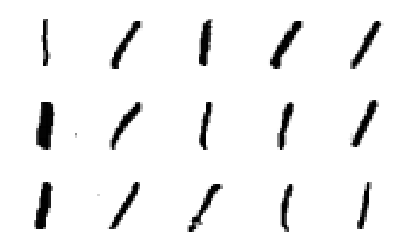

In [6]:
plot_images(data1)

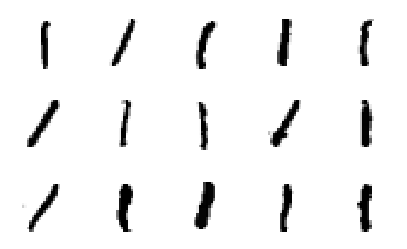

In [7]:
plot_images(data2)

In [8]:
kernel = kernels.RBF(med_heuristic=True, X=data1, Y=data2)

No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


In [9]:
mmd = metrics.MMD(kernel)
val = mmd(data1, data2)
val = val**0.5
val

Array(0.09581081, dtype=float32)

In [10]:
n = data1.shape[0]
nboot = 500
alpha = 0.05
boot_stats = mmd.test_threshold(n, data1, Y=data2, nboot=nboot, method="bootstrap_efron_full")
boot_stats = np.array(boot_stats)**0.5
quantile = np.quantile(boot_stats, 1 - alpha)

/home/clustor/ma/x/xl6116/research/robust-kernel-test/src/metrics.py:59: UserWarning: Explicitly requested dtype int requested in arange is not available, and will be truncated to dtype int32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  np.reshape(np.arange(n, dtype="int"), (1, -1)), repeats=n, axis=0,


In [11]:
theta = 0.2

test_stat = theta - val
boot_pval = np.sum(test_stat <= boot_stats) / boot_stats.shape[0]
boot_rej = np.float32(boot_pval < alpha)

In [12]:
boot_rej

1.0

In [13]:
def add_noise(images, std):
    noise = np.random.normal(loc=0., scale=std, size=images.shape)
    images = images + noise
    images = np.clip(images, 0., 1.)
    return images

def create_mix_data(images1, images2, eps):
    n = images1.shape[0]
    nrep = int(eps * n)
    rep_idx = np.random.choice(n, nrep)
    new_data_idx = np.random.choice(images2.shape[0], nrep)
    images1_cp = images1.copy()
    images1_cp[rep_idx] = images2[new_data_idx]
    return images1_cp

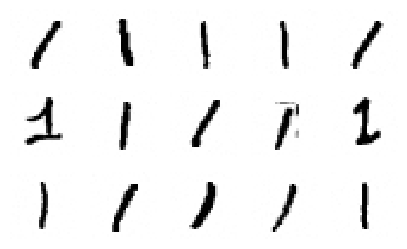

In [14]:
np.random.seed(2024)

img_noise = add_noise(data1, std=.005)
plot_images(img_noise, False)

In [15]:
X = img_noise
Y = data2

mmd = metrics.MMD(kernel)
val = mmd(X, Y)
val = val**0.5

boot_stats = mmd.test_threshold(n, X, Y=Y, nboot=nboot, method="bootstrap_efron_full")
boot_stats = np.array(boot_stats)**0.5
quantile = np.quantile(boot_stats, 1 - alpha)

test_stat = theta - val
boot_pval = np.sum(test_stat <= boot_stats) / boot_stats.shape[0]
boot_rej = np.float32(boot_pval < alpha)
boot_rej

1.0

In [16]:
data_digit3 = select_images(3)
data_digit7 = select_images(7)

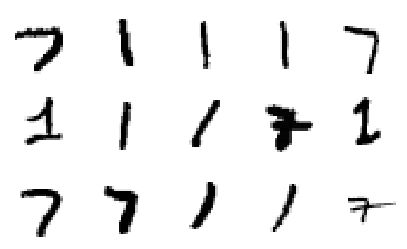

In [17]:
np.random.seed(2024)
img_mix = create_mix_data(data1[:15], data_digit7, eps=0.5)
plot_images(img_mix, False)

In [22]:
def mix_experiment(eps_ls, nrep, digit1, digit2, n, ol_data, theta, theta_prime=0., beta=0.2, alpha=0.05):
    res = {"eps": eps_ls, "boot": {"rej": [], "theta": [], "val": []}, "power": {"rej": [], "theta": []},
          }
    for eps in eps_ls:
        print(f"eps: {eps}")
        val_ls = []
        rej_boot_ls = []
        rej_power_ls = []
        theta_power_ls = []
        
        all_data1 = select_images(digit1)
        all_data2 = select_images(digit2)[:1000]
        
        for i in trange(nrep):
            # iter.set_description(f"[{i+1} / {nrep}]")
            draw_idx1 = np.random.choice(all_data1.shape[0], n)
            data1 = all_data1[draw_idx1]
            draw_idx2 = np.random.choice(all_data2.shape[0], n)
            data2 = all_data2[draw_idx2]
            img_mix = create_mix_data(data2, ol_data, eps=eps)
        
            X = data1
            Y = img_mix
            
            mmd = metrics.MMD(kernel)
            val = mmd(X, Y)
            val = val**0.5
            val_ls.append(val)
            
            # 1. MMD
            boot_stats = mmd.test_threshold(n, X, Y=Y, nboot=nboot, method="bootstrap_efron_full")
            boot_stats = np.array(boot_stats)**0.5
            
            test_stat = theta - val
            boot_pval = np.sum(test_stat <= boot_stats) / boot_stats.shape[0]
            boot_rej = np.float32(boot_pval < alpha)
            rej_boot_ls.append(boot_rej)

            # 2. MMD with power
            boot_stats = mmd.test_threshold(n, X, Y=Y, nboot=nboot, method="bootstrap_efron_full")
            boot_stats = np.array(boot_stats)**0.5
            
            gamma_beta = np.quantile(boot_stats, 1 - beta)
            gamma_alpha = np.quantile(boot_stats, 1 - alpha)
            theta_power = theta_prime + gamma_alpha + gamma_beta
            
            test_stat_power = theta_power - val
            boot_pval_power = np.sum(test_stat_power <= boot_stats) / boot_stats.shape[0]
            boot_rej_power = np.float32(boot_pval_power < alpha)
            rej_power_ls.append(boot_rej_power)
            theta_power_ls.append(theta_power)

        res["boot"]["val"].append(val_ls)
        res["boot"]["rej"].append(rej_boot_ls)
        res["boot"]["theta"].append([theta] * len(rej_boot_ls))
        res["power"]["rej"].append(rej_power_ls)
        res["power"]["theta"].append(theta_power_ls)

    return res

In [23]:
np.random.seed(2024)

data1 = select_images(1)[:200]
data2 = select_images(1)[200:400]

eps_ls = [0., 0.01, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3]
mix_res = mix_experiment(eps_ls, nrep=50, data1=data1, data2=data2, ol_data=data_digit7[:100], theta=0.2, beta=0.05)
# mix_res = mix_experiment(eps_ls, nrep=20, digit1=1, digit2=1, n=n, ol_data=ol_data, theta=0.15, beta=0.1)

eps: 0.0


  0%|          | 0/20 [00:00<?, ?it/s]


KeyboardInterrupt



In [ ]:
mix_res2 = mix_experiment(eps_ls, nrep=50, data1=data1, data2=data2, ol_data=data_digit7[:100], theta=0.2, beta=0.02)

In [ ]:
mix_res3 = mix_experiment(eps_ls, nrep=50, data1=data1, data2=data2, ol_data=data_digit7[:100], theta=0.2, beta=0.03)

Text(0, 0.5, 'Rejection probability')

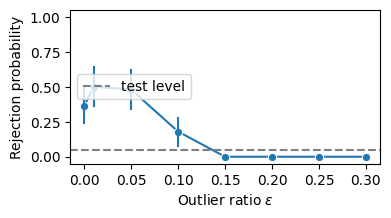

In [742]:
_, ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 2))

# method_ls = ["boot", "power"]
method_ls = ["power"]
mix_res_df = {"eps": [], "rej": [], "method": [], "theta": []}
for mm in method_ls:
    for i, eps in enumerate(mix_res["eps"]):
        subrej = mix_res[mm]["rej"][i]
        mix_res_df["eps"] = mix_res_df["eps"] + [eps] * len(subrej)
        mix_res_df["rej"] = mix_res_df["rej"] + subrej
        mix_res_df["method"] = mix_res_df["method"] + [mm] * len(subrej)
        mix_res_df["theta"] = mix_res_df["theta"] + mix_res[mm]["theta"][i]
        # if mm == "power":
        #     mix_res_df["theta"] = mix_res_df["theta"] + mix_res[mm]["theta"][i]
        # else:
        #     mix_res_df["theta"] = mix_res_df["theta"] + [theta] * len(subrej)
mix_res_df = pd.DataFrame(mix_res_df)

sns.lineplot(ax=ax, data=mix_res_df, x="eps", y="rej", hue="method", style="method", markers=True, dashes=False, err_style="bars")
ax.legend([],[], frameon=False)
gg = ax.axhline(0.05, color="grey", linestyle="--", label="test level")
ax.legend([gg], ["test level"], loc="center left")
ax.set_ylim(-0.05, 1.05)
# ax.set_yscale("log")
ax.set_xlabel(r"Outlier ratio $\epsilon$")
ax.set_ylabel("Rejection probability")

Text(0, 0.5, 'Rejection probability')

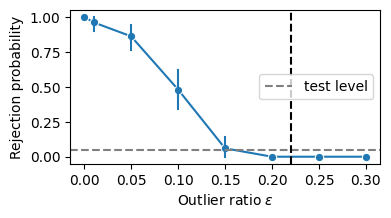

In [746]:
_, ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 2))

# method_ls = ["boot", "power"]
method_ls = ["power"]
mix_res_df = {"eps": [], "rej": [], "method": [], "theta": []}
for mm in method_ls:
    for i, eps in enumerate(mix_res2["eps"]):
        subrej = mix_res2[mm]["rej"][i]
        mix_res_df["eps"] = mix_res_df["eps"] + [eps] * len(subrej)
        mix_res_df["rej"] = mix_res_df["rej"] + subrej
        mix_res_df["method"] = mix_res_df["method"] + [mm] * len(subrej)
        mix_res_df["theta"] = mix_res_df["theta"] + mix_res[mm]["theta"][i]
        # if mm == "power":
        #     mix_res_df["theta"] = mix_res_df["theta"] + mix_res[mm]["theta"][i]
        # else:
        #     mix_res_df["theta"] = mix_res_df["theta"] + [theta] * len(subrej)
mix_res_df = pd.DataFrame(mix_res_df)

sns.lineplot(ax=ax, data=mix_res_df, x="eps", y="rej", hue="method", style="method", markers=True, dashes=False, err_style="bars")
ax.legend([],[], frameon=False)
gg = ax.axhline(0.05, color="grey", linestyle="--", label="test level")
ax.axvline(0.22, linestyle="--", color="k")
ax.legend([gg], ["test level"], loc="center right")
ax.set_ylim(-0.05, 1.05)
# ax.set_yscale("log")
ax.set_xlabel(r"Outlier ratio $\epsilon$")
ax.set_ylabel("Rejection probability")

In [568]:
np.random.seed(2024)

data1 = select_images(1)[:200]
data2 = select_images(1)[200:400]

eps_ls = [0., 0.01, 0.05, 0.1, 0.15]
mix_res2 = mix_experiment(eps_ls, nrep=50, data1=data1, data2=data2, ol_data=data_digit7[:100], theta=0.2, beta=0.2)

eps: 0.0


  0%|          | 0/50 [00:00<?, ?it/s]

eps: 0.01


  0%|          | 0/50 [00:00<?, ?it/s]

eps: 0.05


  0%|          | 0/50 [00:00<?, ?it/s]

eps: 0.1


  0%|          | 0/50 [00:00<?, ?it/s]

eps: 0.15


  0%|          | 0/50 [00:00<?, ?it/s]

Text(0, 0.5, 'Rejection probability')

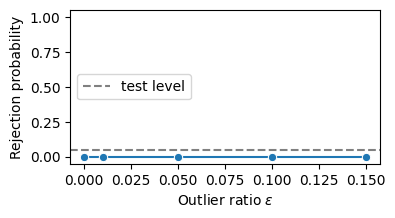

In [569]:
_, ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 2))

# method_ls = ["boot", "power"]
method_ls = ["power"]
mix_res_df = {"eps": [], "rej": [], "method": [], "theta": []}
for mm in method_ls:
    for i, eps in enumerate(mix_res2["eps"]):
        subrej = mix_res2[mm]["rej"][i]
        mix_res_df["eps"] = mix_res_df["eps"] + [eps] * len(subrej)
        mix_res_df["rej"] = mix_res_df["rej"] + subrej
        mix_res_df["method"] = mix_res_df["method"] + [mm] * len(subrej)
        mix_res_df["theta"] = mix_res_df["theta"] + mix_res2[mm]["theta"][i]
mix_res_df = pd.DataFrame(mix_res_df)

sns.lineplot(ax=ax, data=mix_res_df, x="eps", y="rej", hue="method", style="method", markers=True, dashes=False, err_style="bars")
ax.legend([],[], frameon=False)
gg = ax.axhline(0.05, color="grey", linestyle="--", label="test level")
ax.legend([gg], ["test level"], loc="center left")
ax.set_ylim(-0.05, 1.05)
# ax.set_yscale("log")
ax.set_xlabel(r"Outlier ratio $\epsilon$")
ax.set_ylabel("Rejection probability")

#### level study

In [24]:
np.random.seed(2024)

n = 400
ol_data = data_digit7[:100]

eps_ls = [0., 0.01, 0.05, 0.1, 0.15]
mix_res1 = mix_experiment(eps_ls, nrep=20, digit1=1, digit2=1, n=n, ol_data=ol_data, theta=0.15, beta=0.1)

eps: 0.0


  0%|          | 0/20 [00:00<?, ?it/s]

eps: 0.01


  0%|          | 0/20 [00:00<?, ?it/s]

eps: 0.05


  0%|          | 0/20 [00:00<?, ?it/s]

eps: 0.1


  0%|          | 0/20 [00:00<?, ?it/s]

eps: 0.15


  0%|          | 0/20 [00:00<?, ?it/s]

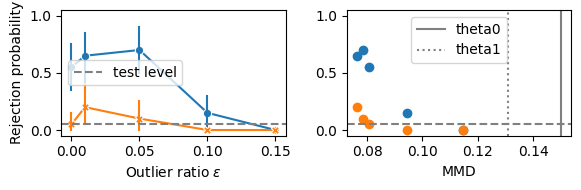

In [25]:
mix_res = mix_res1

_, axes = plt.subplots(nrows=1, ncols=2, figsize=(6, 2))

linestyles = ["solid", "dotted"]
method_ls = ["boot", "power"]
# method_ls = ["power"]
# method_ls = ["boot"]
mix_res_df = {"eps": [], "rej": [], "method": [], "theta": [], "val": []}
for mm in method_ls:
    for i, eps in enumerate(mix_res["eps"]):
        subrej = mix_res[mm]["rej"][i]
        mix_res_df["eps"] = mix_res_df["eps"] + [eps] * len(subrej)
        mix_res_df["rej"] = mix_res_df["rej"] + subrej
        mix_res_df["method"] = mix_res_df["method"] + [mm] * len(subrej)
        mix_res_df["theta"] = mix_res_df["theta"] + mix_res[mm]["theta"][i]
        mix_res_df["val"] = mix_res_df["val"] + np.array(mix_res["boot"]["val"][i]).tolist()
mix_res_df = pd.DataFrame(mix_res_df)

ax = axes[0]
sns.lineplot(ax=ax, data=mix_res_df, x="eps", y="rej", hue="method", style="method", markers=True, dashes=False, err_style="bars")
ax.legend([],[], frameon=False)
gg = ax.axhline(0.05, color="grey", linestyle="--", label="test level")
ax.legend([gg], ["test level"], loc="center left")
ax.set_ylim(-0.05, 1.05)
# ax.set_yscale("log")
ax.set_xlabel(r"Outlier ratio $\epsilon$")
ax.set_ylabel("Rejection probability")

ax = axes[1]
for i, mm in enumerate(method_ls):
    for ee in eps_ls:
        sub_df = mix_res_df.loc[mix_res_df["method"] == mm]
        sub_df = sub_df.loc[sub_df["eps"] == ee]
        # sns.lineplot(ax=ax, data=sub_df, x="val", y="rej", style="method", markers=True, dashes=False, err_style="bars")
        ax.scatter(np.mean(sub_df.val), np.mean(sub_df.rej), color=f"C{i}")
    ax.axvline(sub_df["theta"].to_numpy()[0], color="grey", linestyle=linestyles[i], label=f"theta{i}")
ax.legend()
# ax.legend([],[], frameon=False)
ax.axhline(0.05, color="grey", linestyle="--", label="test level")
ax.set_xlabel(r"MMD")
ax.set_ylim(-0.05, 1.05)

plt.tight_layout()

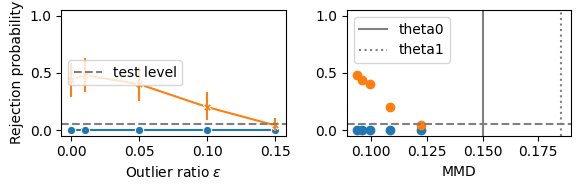

In [847]:
mix_res = mix_res1

_, axes = plt.subplots(nrows=1, ncols=2, figsize=(6, 2))

linestyles = ["solid", "dotted"]
method_ls = ["boot", "power"]
# method_ls = ["power"]
# method_ls = ["boot"]
mix_res_df = {"eps": [], "rej": [], "method": [], "theta": [], "val": []}
for mm in method_ls:
    for i, eps in enumerate(mix_res["eps"]):
        subrej = mix_res[mm]["rej"][i]
        mix_res_df["eps"] = mix_res_df["eps"] + [eps] * len(subrej)
        mix_res_df["rej"] = mix_res_df["rej"] + subrej
        mix_res_df["method"] = mix_res_df["method"] + [mm] * len(subrej)
        mix_res_df["theta"] = mix_res_df["theta"] + mix_res[mm]["theta"][i]
        mix_res_df["val"] = mix_res_df["val"] + np.array(mix_res["boot"]["val"][i]).tolist()
mix_res_df = pd.DataFrame(mix_res_df)

ax = axes[0]
sns.lineplot(ax=ax, data=mix_res_df, x="eps", y="rej", hue="method", style="method", markers=True, dashes=False, err_style="bars")
ax.legend([],[], frameon=False)
gg = ax.axhline(0.05, color="grey", linestyle="--", label="test level")
ax.legend([gg], ["test level"], loc="center left")
ax.set_ylim(-0.05, 1.05)
# ax.set_yscale("log")
ax.set_xlabel(r"Outlier ratio $\epsilon$")
ax.set_ylabel("Rejection probability")

ax = axes[1]
for i, mm in enumerate(method_ls):
    for ee in eps_ls:
        sub_df = mix_res_df.loc[mix_res_df["method"] == mm]
        sub_df = sub_df.loc[sub_df["eps"] == ee]
        # sns.lineplot(ax=ax, data=sub_df, x="val", y="rej", style="method", markers=True, dashes=False, err_style="bars")
        ax.scatter(np.mean(sub_df.val), np.mean(sub_df.rej), color=f"C{i}")
    ax.axvline(sub_df["theta"].to_numpy()[0], color="grey", linestyle=linestyles[i], label=f"theta{i}")
ax.legend()
# ax.legend([],[], frameon=False)
ax.axhline(0.05, color="grey", linestyle="--", label="test level")
ax.set_xlabel(r"MMD")
ax.set_ylim(-0.05, 1.05)

plt.tight_layout()

In [827]:
np.random.seed(2024)

n = 200
ol_data = data_digit7[:100]

eps_ls = [0., 0.01, 0.05, 0.1, 0.15]
mix_res2 = mix_experiment(eps_ls, nrep=10, digit1=1, digit2=1, n=n, ol_data=ol_data, theta=0.19, beta=0.1)

In [797]:
mix_res3 = mix_experiment(eps_ls, nrep=10, data1=data1, data2=data2, ol_data=ol_data, theta=0.18, beta=0.1)

eps: 0.0


  0%|          | 0/10 [00:00<?, ?it/s]

eps: 0.01


  0%|          | 0/10 [00:00<?, ?it/s]

eps: 0.05


  0%|          | 0/10 [00:00<?, ?it/s]

eps: 0.1


  0%|          | 0/10 [00:00<?, ?it/s]

eps: 0.15


  0%|          | 0/10 [00:00<?, ?it/s]

In [799]:
# mix_res1 = mix_res

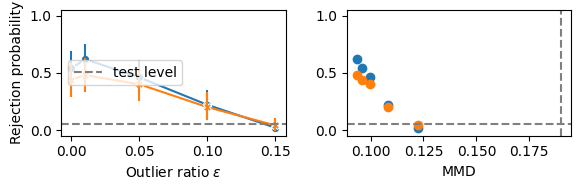

In [821]:
mix_res = mix_res2

_, axes = plt.subplots(nrows=1, ncols=2, figsize=(6, 2))

method_ls = ["boot", "power"]
# method_ls = ["power"]
# method_ls = ["boot"]
mix_res_df = {"eps": [], "rej": [], "method": [], "theta": [], "val": []}
for mm in method_ls:
    for i, eps in enumerate(mix_res["eps"]):
        subrej = mix_res[mm]["rej"][i]
        mix_res_df["eps"] = mix_res_df["eps"] + [eps] * len(subrej)
        mix_res_df["rej"] = mix_res_df["rej"] + subrej
        mix_res_df["method"] = mix_res_df["method"] + [mm] * len(subrej)
        mix_res_df["theta"] = mix_res_df["theta"] + mix_res[mm]["theta"][i]
        mix_res_df["val"] = mix_res_df["val"] + np.array(mix_res["boot"]["val"][i]).tolist()
mix_res_df = pd.DataFrame(mix_res_df)

ax = axes[0]
sns.lineplot(ax=ax, data=mix_res_df, x="eps", y="rej", hue="method", style="method", markers=True, dashes=False, err_style="bars")
ax.legend([],[], frameon=False)
gg = ax.axhline(0.05, color="grey", linestyle="--", label="test level")
ax.legend([gg], ["test level"], loc="center left")
ax.set_ylim(-0.05, 1.05)
# ax.set_yscale("log")
ax.set_xlabel(r"Outlier ratio $\epsilon$")
ax.set_ylabel("Rejection probability")

ax = axes[1]
for i, mm in enumerate(method_ls):
    for ee in eps_ls:
        sub_df = mix_res_df.loc[mix_res_df["method"] == mm]
        sub_df = sub_df.loc[sub_df["eps"] == ee]
        # sns.lineplot(ax=ax, data=sub_df, x="val", y="rej", style="method", markers=True, dashes=False, err_style="bars")
        ax.scatter(np.mean(sub_df.val), np.mean(sub_df.rej), color=f"C{i}")
# ax.legend([],[], frameon=False)
ax.axhline(0.05, color="grey", linestyle="--", label="test level")
ax.axvline(mix_res_df.loc[0, "theta"], color="grey", linestyle="--", label="theta")
ax.set_xlabel(r"MMD")
ax.set_ylim(-0.05, 1.05)

plt.tight_layout()

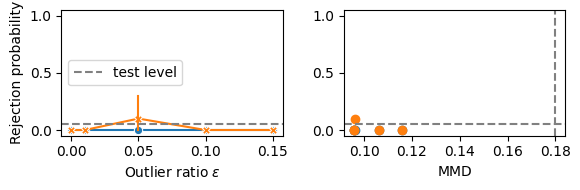

In [810]:
mix_res = mix_res3

_, axes = plt.subplots(nrows=1, ncols=2, figsize=(6, 2))

method_ls = ["boot", "power"]
# method_ls = ["power"]
# method_ls = ["boot"]
mix_res_df = {"eps": [], "rej": [], "method": [], "theta": [], "val": []}
for mm in method_ls:
    for i, eps in enumerate(mix_res["eps"]):
        subrej = mix_res[mm]["rej"][i]
        mix_res_df["eps"] = mix_res_df["eps"] + [eps] * len(subrej)
        mix_res_df["rej"] = mix_res_df["rej"] + subrej
        mix_res_df["method"] = mix_res_df["method"] + [mm] * len(subrej)
        mix_res_df["theta"] = mix_res_df["theta"] + mix_res[mm]["theta"][i]
        mix_res_df["val"] = mix_res_df["val"] + np.array(mix_res["boot"]["val"][i]).tolist()
mix_res_df = pd.DataFrame(mix_res_df)

ax = axes[0]
sns.lineplot(ax=ax, data=mix_res_df, x="eps", y="rej", hue="method", style="method", markers=True, dashes=False, err_style="bars")
ax.legend([],[], frameon=False)
gg = ax.axhline(0.05, color="grey", linestyle="--", label="test level")
ax.legend([gg], ["test level"], loc="center left")
ax.set_ylim(-0.05, 1.05)
# ax.set_yscale("log")
ax.set_xlabel(r"Outlier ratio $\epsilon$")
ax.set_ylabel("Rejection probability")

ax = axes[1]
for i, mm in enumerate(method_ls):
    for ee in eps_ls:
        sub_df = mix_res_df.loc[mix_res_df["method"] == mm]
        sub_df = sub_df.loc[sub_df["eps"] == ee]
        # sns.lineplot(ax=ax, data=sub_df, x="val", y="rej", style="method", markers=True, dashes=False, err_style="bars")
        ax.scatter(np.mean(sub_df.val), np.mean(sub_df.rej), color=f"C{i}")
# ax.legend([],[], frameon=False)
ax.axhline(0.05, color="grey", linestyle="--", label="test level")
ax.axvline(mix_res_df.loc[0, "theta"], color="grey", linestyle="--", label="theta")
ax.set_xlabel(r"MMD")
ax.set_ylim(-0.05, 1.05)

plt.tight_layout()